In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# 載入經過前處理的資料集
df = pd.read_csv("new_airline_passenger_satisfaction.csv")
df

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,1,0,0,0,1,0
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,0,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,1,1,0,0,1
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,1,1,1,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,34,526,3,3,4,3,4,4,3,2,4,4,5,4,0,1,1,0,0,0
129483,23,646,4,4,4,4,4,4,4,5,5,5,5,4,1,1,1,0,0,1
129484,17,828,2,1,2,1,2,2,4,3,4,5,4,2,1,0,0,1,0,0
129485,14,1127,3,3,4,4,4,4,3,2,5,4,5,4,1,1,1,0,0,1


In [3]:
# 使用 minimax scaling 正規化技術       把資料尺度轉到0~1
MMscaler = MinMaxScaler(feature_range=(0, 1))
scaling = MMscaler.fit_transform(df)
scaled_data = pd.DataFrame(data = scaling)
scaled_data.columns = [i for i in df.columns]
scaled_data.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type_Loyal Customer,type_of_travel_Business travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.0,1.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,1.0,1.0,1.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,1.0,1.0,1.0,0.0,0.0,1.0


In [4]:
# 設定因變數 x without minimax
x = df.drop(['satisfaction_satisfied'],axis=1).copy()

# 設定目標變數 y without minimax
y = df['satisfaction_satisfied'].copy()
y

0         0
1         0
2         1
3         0
4         1
         ..
129482    0
129483    1
129484    0
129485    1
129486    0
Name: satisfaction_satisfied, Length: 129487, dtype: int64

In [5]:
# 設定因變數 x with minimax
scaled_x = scaled_data.drop(['satisfaction_satisfied'],axis=1).copy()

# 設定目標變數 y with minimax
scaled_y = scaled_data['satisfaction_satisfied'].copy()
scaled_y = scaled_y.astype(int)
scaled_y

0         0
1         0
2         1
3         0
4         1
         ..
129482    0
129483    1
129484    0
129485    1
129486    0
Name: satisfaction_satisfied, Length: 129487, dtype: int32

In [6]:
# 分割訓練資料、測試資料
# Split the data (split into 67% training data & 33% testing data) (lock seed) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2000)

print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 49064, 1: 37692})
------------------------------------
y_test : Counter({0: 24161, 1: 18570})


# 模型訓練

In [7]:
no_scaling_model = DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = None,
                                          max_leaf_nodes = None,
                                          min_samples_leaf = 1,
                                          random_state = 2000)
no_scaling_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2000)

In [8]:
# 訓練結果
# 使用訓練集評估
training_prediction = no_scaling_model.predict(x_train)
training_acc = accuracy_score(y_train,training_prediction)    # Accuracy
training_f1s = f1_score(y_train,training_prediction,pos_label=1)  # f1 score
training_pre = precision_score(y_train,training_prediction,pos_label = 1)   # precision
training_sen = sensitivity_score(y_train,training_prediction,pos_label = 1) #sensitivity
training_spe = specificity_score(y_train,training_prediction,pos_label = 1) #specificity
training_cm = confusion_matrix(y_train,training_prediction)   #confusion matrix

print("Without scaling")
print('Training result:')
print('Training ACC:', round(training_acc*100,2))
print('Training f1s:', round(training_f1s*100,2))
print('Training pre:', round(training_pre*100,2))
print('Training sen:', round(training_sen*100,2))
print('Training spe:', round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)

# 使用測試集評估
testing_prediction = no_scaling_model.predict(x_test)
testing_acc = accuracy_score(y_test,testing_prediction)
testing_f1s = f1_score(y_test,testing_prediction,pos_label = 1)
testing_pre = precision_score(y_test,testing_prediction,pos_label = 1)
testing_sen = sensitivity_score(y_test,testing_prediction,pos_label = 1)
testing_spe = specificity_score(y_test,testing_prediction,pos_label = 1)
testing_cm = confusion_matrix(y_test,testing_prediction)

print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:', round(testing_acc*100,2))
print('Testing f1s:', round(testing_f1s*100,2))
print('Testing pre:', round(testing_pre*100,2))
print('Testing sen:', round(testing_sen*100,2))
print('Testing spe:', round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Without scaling
Training result:
Training ACC: 100.0
Training f1s: 100.0
Training pre: 100.0
Training sen: 100.0
Training spe: 100.0

Training confusion matrix:
[[49064     0]
 [    0 37692]]
+-----------------------------------------+
Testing result:
Testing ACC: 94.54
Testing f1s: 93.74
Testing pre: 93.41
Testing sen: 94.08
Testing spe: 94.9

Testing confusion matrix:
[[22928  1233]
 [ 1099 17471]]


In [9]:
CV3F_acc = cross_val_score(no_scaling_model, x_train, y_train, cv = 3, scoring = "accuracy")
print("Each fold ACC:", CV3F_acc)
print("Average ACC:", round((np.mean(CV3F_acc))*100,2), '+/-', round((np.std(CV3F_acc))*100,2))

Each fold ACC: [0.93886372 0.94194128 0.93882703]
Average ACC: 93.99 +/- 0.15


# 超參數調參過程

In [10]:
# Split the data (split into 67% training data & 33% testing data) (lock seed) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2000)

# for 迴圈 調參
best_parameters = [0] * 3
best_acc = 0
hyper_parameters = [[13,14,15],[90,100,110],[20,50,80]]
num = 1
for depth in hyper_parameters[0]:
    for nodes in hyper_parameters[1]:
        for leaf in hyper_parameters[2]:
            model_cart = DecisionTreeClassifier(criterion='gini',
                                                max_depth = depth,
                                                max_leaf_nodes = nodes,
                                                min_samples_leaf = leaf,
                                                random_state = 2000)
            model_cart.fit(x_train,y_train)
            CV3F_cart_acc = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'accuracy')
            CV3F_cart_pre = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'precision')
            CV3F_cart_f1 = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'f1')
            CV3F_cart_recall = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'recall')            
            
            acc = np.array_split(CV3F_cart_acc, 3)
            pre = np.array_split(CV3F_cart_pre, 3)
            recall = np.array_split(CV3F_cart_recall, 3)
            
            z = np.array([])
            for i in range(len(acc)):
                a = 1
                b = (1-recall[i])/recall[i]
                c = (1-pre[i])/pre[i]
                d = (acc[i]+acc[i]*b+acc[i]*c-1)/(1-acc[i])
                SPE = c/(c+d)
                z = np.append(z,SPE)
            
            
            print('Training result',num)
            print("max_depth=%d,max_leaf_nodes=%d,min_samples_leaf=%d"%(depth,nodes,leaf))
            print("+---------------------------------------------------------------------------------------------+")
            print('Each fold ACC:',CV3F_cart_acc)
            print('Average ACC:',round((np.mean(CV3F_cart_acc))*100,2),'+/-',round((np.std(CV3F_cart_acc))*100,2))          
            print("+---------------------------------------------------------------------------------------------+")
            print('Each fold SEN:',CV3F_cart_recall)
            print('Average SEN:',round((np.mean(CV3F_cart_recall))*100,2),'+/-',round((np.std(CV3F_cart_recall))*100,2))
            print("+---------------------------------------------------------------------------------------------+")
            print('Each fold SPE:',z)
            print('Average SPE:',round((np.mean(z))*100,2),'+/-',round((np.std(z))*100,2))
            print("+---------------------------------------------------------------------------------------------+")
            print('Each fold precision:',CV3F_cart_pre)
            print('Average pre:',round((np.mean(CV3F_cart_pre))*100,2),'+/-',round((np.std(CV3F_cart_pre))*100,2))
            print("+---------------------------------------------------------------------------------------------+")
            print('Each fold f1-score:',CV3F_cart_f1)
            print('Average f1-score:',round((np.mean(CV3F_cart_f1))*100,2),'+/-',round((np.std(CV3F_cart_f1))*100,2))
            print("+---------------------------------------------------------------------------------------------+")
            print('Depth: ',model_cart.get_depth())
            print('Leaves:',model_cart.get_n_leaves())
            print("+---------------------------------------------------------------------------------------------+")
            
            print("\n")

            if round((np.mean(CV3F_cart_acc))*100,2) > best_acc:
                best_acc = round((np.mean(CV3F_cart_acc))*100,2)
                best_parameters[0], best_parameters[1], best_parameters[2] = depth, nodes, leaf
            num += 1

print("最佳超參數: ", best_parameters)

Training result 1
max_depth=13,max_leaf_nodes=90,min_samples_leaf=20
+---------------------------------------------------------------------------------------------+
Each fold ACC: [0.94266745 0.94577959 0.94501694]
Average ACC: 94.45 +/- 0.13
+---------------------------------------------------------------------------------------------+
Each fold SEN: [0.91236867 0.9194524  0.91189112]
Average SEN: 91.46 +/- 0.35
+---------------------------------------------------------------------------------------------+
Each fold SPE: [0.03405686 0.03399572 0.02953406]
Average SPE: 3.25 +/- 0.21
+---------------------------------------------------------------------------------------------+
Each fold precision: [0.95366057 0.95407995 0.95954774]
Average pre: 95.58 +/- 0.27
+---------------------------------------------------------------------------------------------+
Each fold f1-score: [0.93255776 0.93644617 0.93511263]
Average f1-score: 93.47 +/- 0.16
+---------------------------------------------

In [ ]:
# max_depth = 13 max_leaf_nodes = 110 min_samples_leaf = 20(最佳)
model_cart = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = best_parameters[0],
                                    max_leaf_nodes = best_parameters[1],
                                    min_samples_leaf = best_parameters[2],
                                    random_state = 2000)
model_cart.fit(x_train,y_train)
CV3F_cart_acc = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'accuracy')
CV3F_cart_pre = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'precision')
CV3F_cart_f1 = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'f1')
CV3F_cart_recall = cross_val_score(model_cart, x_train, y_train, cv = 3, scoring = 'recall')

acc = np.array_split(CV3F_cart_acc, 3)
pre = np.array_split(CV3F_cart_pre, 3)
recall = np.array_split(CV3F_cart_recall, 3)

z = np.array([])
for i in range(len(acc)):
    a = 1
    b = (1-recall[i])/recall[i]
    c = (1-pre[i])/pre[i]
    d = (acc[i]+acc[i]*b+acc[i]*c-1)/(1-acc[i])
    SPE = c/(c+d)
    z = np.append(z,SPE) 
    
print('Training result')
print("+---------------------------------------------------------------------------------------------+")
print('Each fold ACC:',CV3F_cart_acc)
print('Average ACC:',round((np.mean(CV3F_cart_acc))*100,2),'+/-',round((np.std(CV3F_cart_acc))*100,2))

print("+---------------------------------------------------------------------------------------------+")
print('Each fold SEN:',CV3F_cart_recall)
print('Average SEN:',round((np.mean(CV3F_cart_recall))*100,2),'+/-',round((np.std(CV3F_cart_recall))*100,2))

print("+---------------------------------------------------------------------------------------------+")
print('Each fold SPE:',z)
print('Average SPE:',round((np.mean(z))*100,2),'+/-',round((np.std(z))*100,2))
print("+---------------------------------------------------------------------------------------------+")
print('Each fold precision:',CV3F_cart_pre)
print('Average pre:',round((np.mean(CV3F_cart_pre))*100,2),'+/-',round((np.std(CV3F_cart_pre))*100,2))
print("+---------------------------------------------------------------------------------------------+")
print('Each fold f1-score:',CV3F_cart_f1)
print('Average f1-score:',round((np.mean(CV3F_cart_f1))*100,2),'+/-',round((np.std(CV3F_cart_f1))*100,2))
print("+---------------------------------------------------------------------------------------------+")
print('Depth: ',model_cart.get_depth())
print('Leaves:',model_cart.get_n_leaves())

Training result
+---------------------------------------------------------------------------------------------+
Each fold ACC: [0.94577959 0.94809641 0.94729926]
Average ACC: 94.71 +/- 0.1
+---------------------------------------------------------------------------------------------+
Each fold SEN: [0.9184177  0.92231773 0.92032792]
Average SEN: 92.04 +/- 0.16
+---------------------------------------------------------------------------------------------+
Each fold SPE: [0.03320086 0.03210028 0.03197994]
Average SPE: 3.24 +/- 0.05
+---------------------------------------------------------------------------------------------+
Each fold precision: [0.95505711 0.95665814 0.95672679]
Average pre: 95.61 +/- 0.08
+---------------------------------------------------------------------------------------------+
Each fold f1-score: [0.93637913 0.93917413 0.93817444]
Average f1-score: 93.79 +/- 0.12
+---------------------------------------------------------------------------------------------+
Dept

Testing result:
Testing ACC: 95.05
Testing f1s: 94.17
Testing pre: 96.44
Testing sen: 91.99
Testing spe: 97.39


c:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


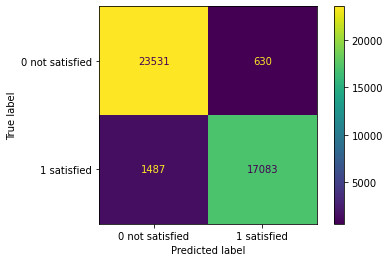

In [12]:
# Evaluate with testing data set
final_model_testing_prediction = model_cart.predict(x_test)
final_model_testing_acc = accuracy_score(y_test, final_model_testing_prediction)
final_model_testing_f1s = f1_score(y_test, final_model_testing_prediction, pos_label = 1)
final_model_testing_pre = precision_score(y_test, final_model_testing_prediction, pos_label = 1)
final_model_testing_sen = sensitivity_score(y_test, final_model_testing_prediction, pos_label = 1)
final_model_testing_spe = specificity_score(y_test, final_model_testing_prediction, pos_label = 1)

print("Testing result:")
print('Testing ACC:', round(final_model_testing_acc*100, 2))
print('Testing f1s:', round(final_model_testing_f1s*100, 2))
print('Testing pre:', round(final_model_testing_pre*100, 2))
print('Testing sen:', round(final_model_testing_sen*100, 2))
print('Testing spe:', round(final_model_testing_spe*100, 2))
plot_confusion_matrix(model_cart, x_test, y_test, display_labels = ["0 not satisfied", "1 satisfied"])

[Text(0.3497094002695418, 0.9642857142857143, 'online_boarding <= 3.5\ngini = 0.491\nsamples = 86756\nvalue = [49064, 37692]\nclass = 0 not satisfied'),
 Text(0.17452830188679244, 0.8928571428571429, 'inflight_wifi_service <= 0.5\ngini = 0.255\nsamples = 43634\nvalue = [37091, 6543]\nclass = 0 not satisfied'),
 Text(0.1637466307277628, 0.8214285714285714, 'gini = 0.008\nsamples = 1482\nvalue = [6, 1476]\nclass = 1 satisfied'),
 Text(0.1853099730458221, 0.8214285714285714, 'inflight_wifi_service <= 3.5\ngini = 0.212\nsamples = 42152\nvalue = [37085, 5067]\nclass = 0 not satisfied'),
 Text(0.0876010781671159, 0.75, 'customer_class_Business <= 0.5\ngini = 0.122\nsamples = 38184\nvalue = [35693, 2491]\nclass = 0 not satisfied'),
 Text(0.03234501347708895, 0.6785714285714286, 'ease_of_online_booking <= 3.5\ngini = 0.032\nsamples = 27469\nvalue = [27029, 440]\nclass = 0 not satisfied'),
 Text(0.0215633423180593, 0.6071428571428571, 'gini = 0.02\nsamples = 25556\nvalue = [25292, 264]\nclass =

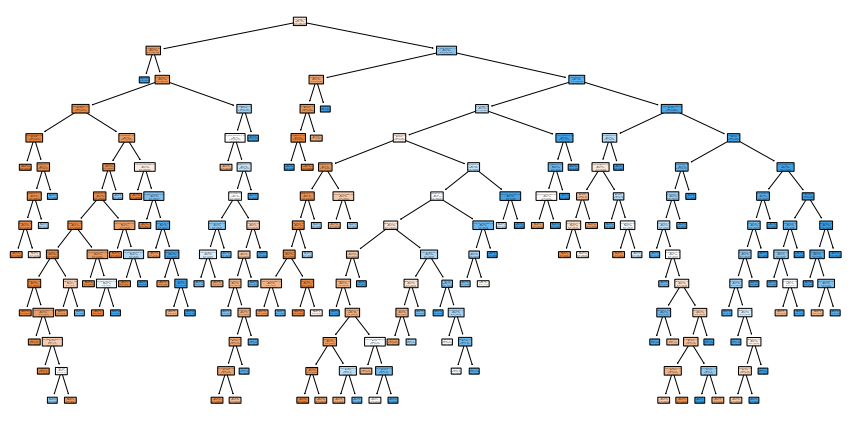

In [13]:
# Plot tree
plt.figure(figsize = (15,7.5))
tree.plot_tree(model_cart,
               filled = True,
               rounded = True,
               class_names = ["0 not satisfied", "1 satisfied"],
               feature_names = x.columns)